In [ ]:
pip install psycopg2

In [ ]:
pip install openpyxl

In [ ]:
import psycopg2
import pandas as pd
import psycopg2.extras
import psycopg2

In [ ]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "123456",
                                           host = "127.0.0.1",
                                           port = "5433")

    def getConnection(self):
        print("successfully connected to database")
        return self.connection

In [ ]:
con = PostgresConnection().getConnection()

In [ ]:
cur = con.cursor()
select_stmt = '''select  t.year,
               t.month,
               i.item_name,
               sum(f.total_price) 
               from ecomdb.fact_table f 
               join ecomdb.time_dim t on t.time_key = f.time_key
               join ecomdb.item_dim i on i.item_key = f.item_key
               group by (i.item_name,t.year,t.month)
               order by (i.item_name,t.year) '''
cur.execute(select_stmt)
records = cur.fetchall()
records

In [ ]:
df = pd.DataFrame(list(records), columns=['year', 'month', 'item_name','total_sales'])
df.head()

In [8]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [9]:
X = df.iloc[:,:-1]
X.item_name.duplicated().sum()

21756

In [16]:
X = pd.get_dummies(X,columns = ['item_name'])

In [17]:
X.head()

,year,month,item_name_100% Juice Box Variety 6.75 oz,item_name_A&W Root Beer - 12 oz cans,item_name_A&W Root Beer Diet - 12 oz cans,item_name_Advil 2 pill packets,item_name_All Purpose Cleaner 409 Spray,item_name_Altoids Small Packs Variety,item_name_Apple Sauce Variety GoGO Squeeze 3.2oz,item_name_AquaFina Purified Drinking Water 16oz,...,item_name_Waterloo Sparkling Lemon 12oz,item_name_Waterloo Sparkling Lime 12oz,item_name_Waterloo Sparkling Mango 12oz,item_name_Waterloo Sparkling Original 12oz,item_name_Waterloo Sparkling Watermelon 12oz,item_name_Welch's 100% Juice Variety10 oz,item_name_Wint O Green LifeSavers Sugar Free,item_name_Wonderful Pistachios (in shell),item_name_Yoplait Original Yogurt Variety Pack,item_name_Zoo Animal Cookies/Crackers
0,2014,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2014,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2014,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2014,4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
y = df.iloc[:,-1]
y.head()

0    1980.0
1    3360.0
2    4470.0
3    3060.0
4    4500.0
Name: total_sales, dtype: object

In [11]:
pip install sklearn

In [19]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state = 10)

In [20]:
X_train

,year,month,item_name_100% Juice Box Variety 6.75 oz,item_name_A&W Root Beer - 12 oz cans,item_name_A&W Root Beer Diet - 12 oz cans,item_name_Advil 2 pill packets,item_name_All Purpose Cleaner 409 Spray,item_name_Altoids Small Packs Variety,item_name_Apple Sauce Variety GoGO Squeeze 3.2oz,item_name_AquaFina Purified Drinking Water 16oz,...,item_name_Waterloo Sparkling Lemon 12oz,item_name_Waterloo Sparkling Lime 12oz,item_name_Waterloo Sparkling Mango 12oz,item_name_Waterloo Sparkling Original 12oz,item_name_Waterloo Sparkling Watermelon 12oz,item_name_Welch's 100% Juice Variety10 oz,item_name_Wint O Green LifeSavers Sugar Free,item_name_Wonderful Pistachios (in shell),item_name_Yoplait Original Yogurt Variety Pack,item_name_Zoo Animal Cookies/Crackers
1610,2020,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14993,2016,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2189,2019,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9396,2017,11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12572,2020,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9372,2015,11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7291,2019,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17728,2018,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7293,2019,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
from sklearn.linear_model import  LinearRegression
regressor = LinearRegression()

In [22]:
regressor.fit(X_train,y_train)

LinearRegression()

### Accuracy score

In [34]:
regressor.score(X_test,y_test)

0.8534299503445144

In [23]:
pred = regressor.predict(X_test)
pred

array([3677.84328385, 4342.98319518, 4238.66873621, ..., 3229.36425557,
       3295.59786122, 5735.241622  ])

In [24]:
y_test[:5]

9111     3388.0
11470    4704.0
934      2144.0
6909     3502.0
9221     2450.0
Name: total_sales, dtype: object

In [58]:
# X_train['year'].length()

In [29]:
X_test

,year,month,item_name_100% Juice Box Variety 6.75 oz,item_name_A&W Root Beer - 12 oz cans,item_name_A&W Root Beer Diet - 12 oz cans,item_name_Advil 2 pill packets,item_name_All Purpose Cleaner 409 Spray,item_name_Altoids Small Packs Variety,item_name_Apple Sauce Variety GoGO Squeeze 3.2oz,item_name_AquaFina Purified Drinking Water 16oz,...,item_name_Waterloo Sparkling Lemon 12oz,item_name_Waterloo Sparkling Lime 12oz,item_name_Waterloo Sparkling Mango 12oz,item_name_Waterloo Sparkling Original 12oz,item_name_Waterloo Sparkling Watermelon 12oz,item_name_Welch's 100% Juice Variety10 oz,item_name_Wint O Green LifeSavers Sugar Free,item_name_Wonderful Pistachios (in shell),item_name_Yoplait Original Yogurt Variety Pack,item_name_Zoo Animal Cookies/Crackers
9111,2015,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11470,2020,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
934,2021,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6909,2016,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9221,2017,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6667,2017,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17747,2019,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8434,2015,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20215,2019,11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# plt.plot(X_test['year']==2014,y_test)
# plt.show()

In [324]:
X_train.columns

Index(['year', 'month', 'item_name_100% Juice Box Variety 6.75 oz ',
       'item_name_A&W Root Beer - 12 oz cans',
       'item_name_A&W Root Beer Diet - 12 oz cans',
       'item_name_Advil 2 pill packets',
       'item_name_All Purpose Cleaner 409 Spray',
       'item_name_Altoids Small Packs Variety',
       'item_name_Apple Sauce Variety GoGO Squeeze 3.2oz',
       'item_name_AquaFina Purified Drinking Water 16oz',
       ...
       'item_name_Waterloo Sparkling Lemon 12oz',
       'item_name_Waterloo Sparkling Lime 12oz',
       'item_name_Waterloo Sparkling Mango 12oz',
       'item_name_Waterloo Sparkling Original 12oz',
       'item_name_Waterloo Sparkling Watermelon 12oz',
       'item_name_Welch's 100% Juice Variety10 oz',
       'item_name_Wint O Green LifeSavers Sugar Free',
       'item_name_Wonderful Pistachios (in shell)',
       'item_name_Yoplait Original Yogurt Variety Pack ',
       'item_name_Zoo Animal Cookies/Crackers'],
      dtype='object', length=261)

In [57]:
# x_df = X_test[:10]
# y_df = y_test[:10]
# pred_df = pred[:10]
# plt.subplot(1,2,1)
# # x = linspace(0,10);
# # y1 = sin(x);
# plt.plot(x_df['year']==2018,y_df)
# plt.title('Actual values')

# plt.subplot(1,2,2)
# # x = lin?space(0,10);
# # y1 = sin(x);

# plt.plot(x_df['year']==2018,pred_df)
# plt.title('predicted value')


In [338]:
new_df = 0

In [339]:
X.iloc[:12,0]

0     2022
1     2022
2     2022
3     2022
4     2022
5     2022
6     2022
7     2022
8     2022
9     2022
10    2022
11    2022
Name: year, dtype: object

In [327]:
# pr = regressor.predict([[2022,1,1]])

In [340]:
new_df = X.iloc[:12,:]
X_train.columns

Index(['year', 'month', 'item_name_100% Juice Box Variety 6.75 oz ',
       'item_name_A&W Root Beer - 12 oz cans',
       'item_name_A&W Root Beer Diet - 12 oz cans',
       'item_name_Advil 2 pill packets',
       'item_name_All Purpose Cleaner 409 Spray',
       'item_name_Altoids Small Packs Variety',
       'item_name_Apple Sauce Variety GoGO Squeeze 3.2oz',
       'item_name_AquaFina Purified Drinking Water 16oz',
       ...
       'item_name_Waterloo Sparkling Lemon 12oz',
       'item_name_Waterloo Sparkling Lime 12oz',
       'item_name_Waterloo Sparkling Mango 12oz',
       'item_name_Waterloo Sparkling Original 12oz',
       'item_name_Waterloo Sparkling Watermelon 12oz',
       'item_name_Welch's 100% Juice Variety10 oz',
       'item_name_Wint O Green LifeSavers Sugar Free',
       'item_name_Wonderful Pistachios (in shell)',
       'item_name_Yoplait Original Yogurt Variety Pack ',
       'item_name_Zoo Animal Cookies/Crackers'],
      dtype='object', length=261)

In [341]:
new_df

,year,month,item_name_100% Juice Box Variety 6.75 oz,item_name_A&W Root Beer - 12 oz cans,item_name_A&W Root Beer Diet - 12 oz cans,item_name_Advil 2 pill packets,item_name_All Purpose Cleaner 409 Spray,item_name_Altoids Small Packs Variety,item_name_Apple Sauce Variety GoGO Squeeze 3.2oz,item_name_AquaFina Purified Drinking Water 16oz,...,item_name_Waterloo Sparkling Lemon 12oz,item_name_Waterloo Sparkling Lime 12oz,item_name_Waterloo Sparkling Mango 12oz,item_name_Waterloo Sparkling Original 12oz,item_name_Waterloo Sparkling Watermelon 12oz,item_name_Welch's 100% Juice Variety10 oz,item_name_Wint O Green LifeSavers Sugar Free,item_name_Wonderful Pistachios (in shell),item_name_Yoplait Original Yogurt Variety Pack,item_name_Zoo Animal Cookies/Crackers
0,2022,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2022,2,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2022,3,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2022,4,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2022,5,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2022,6,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2022,7,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2022,8,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2022,9,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2022,10,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [342]:
X_test.columns.get_loc("item_name_Waterloo Sparkling Lemon 12oz")

251

In [343]:
for j in range(12):
    for i in range(261):
        new_df.iloc[j,i]=0
for j in range(12):
    new_df.iloc[j,0]=2022
    new_df.iloc[j,1]=j+1
    new_df.iloc[j,251]=1
    
            

C:\Users\Administrator\.conda\envs\HDA\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [344]:
new_df

,year,month,item_name_100% Juice Box Variety 6.75 oz,item_name_A&W Root Beer - 12 oz cans,item_name_A&W Root Beer Diet - 12 oz cans,item_name_Advil 2 pill packets,item_name_All Purpose Cleaner 409 Spray,item_name_Altoids Small Packs Variety,item_name_Apple Sauce Variety GoGO Squeeze 3.2oz,item_name_AquaFina Purified Drinking Water 16oz,...,item_name_Waterloo Sparkling Lemon 12oz,item_name_Waterloo Sparkling Lime 12oz,item_name_Waterloo Sparkling Mango 12oz,item_name_Waterloo Sparkling Original 12oz,item_name_Waterloo Sparkling Watermelon 12oz,item_name_Welch's 100% Juice Variety10 oz,item_name_Wint O Green LifeSavers Sugar Free,item_name_Wonderful Pistachios (in shell),item_name_Yoplait Original Yogurt Variety Pack,item_name_Zoo Animal Cookies/Crackers
0,2022,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2022,2,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2022,3,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,2022,4,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2022,5,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2022,6,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,2022,7,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,2022,8,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,2022,9,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,2022,10,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [307]:
# for j in range(12):
    

In [345]:
new_df

,year,month,item_name_100% Juice Box Variety 6.75 oz,item_name_A&W Root Beer - 12 oz cans,item_name_A&W Root Beer Diet - 12 oz cans,item_name_Advil 2 pill packets,item_name_All Purpose Cleaner 409 Spray,item_name_Altoids Small Packs Variety,item_name_Apple Sauce Variety GoGO Squeeze 3.2oz,item_name_AquaFina Purified Drinking Water 16oz,...,item_name_Waterloo Sparkling Lemon 12oz,item_name_Waterloo Sparkling Lime 12oz,item_name_Waterloo Sparkling Mango 12oz,item_name_Waterloo Sparkling Original 12oz,item_name_Waterloo Sparkling Watermelon 12oz,item_name_Welch's 100% Juice Variety10 oz,item_name_Wint O Green LifeSavers Sugar Free,item_name_Wonderful Pistachios (in shell),item_name_Yoplait Original Yogurt Variety Pack,item_name_Zoo Animal Cookies/Crackers
0,2022,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2022,2,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2022,3,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,2022,4,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2022,5,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2022,6,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,2022,7,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,2022,8,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,2022,9,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,2022,10,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [309]:
# new_df = new_df.values.reshape(1,-1)

In [346]:
pred_2022=regressor.predict(new_df)

In [347]:
pred_2022

array([1967.00607985, 2001.81533961, 2036.62459936, 2071.43385912,
       2106.24311888, 2141.05237863, 2175.86163839, 2210.67089814,
       2245.4801579 , 2280.28941766, 2315.09867741, 2349.90793717])

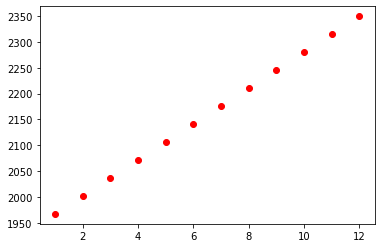

In [348]:
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],pred_2022,'ro')

# SVM

In [ ]:
df.head()

In [ ]:
df_new = pd.get_dummies(df,columns = ['item_name'])

In [ ]:
df_new.head()

In [11]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22015 entries, 0 to 22014
Columns: 262 entries, year to item_name_Zoo Animal Cookies/Crackers
dtypes: object(3), uint8(259)
memory usage: 5.9+ MB


In [12]:
X_svm = df_new.iloc[:,:-1]
X_svm.head()

,year,month,total_sales,item_name_100% Juice Box Variety 6.75 oz,item_name_A&W Root Beer - 12 oz cans,item_name_A&W Root Beer Diet - 12 oz cans,item_name_Advil 2 pill packets,item_name_All Purpose Cleaner 409 Spray,item_name_Altoids Small Packs Variety,item_name_Apple Sauce Variety GoGO Squeeze 3.2oz,...,item_name_Waterloo Sparkling Grapefruit 12oz,item_name_Waterloo Sparkling Lemon 12oz,item_name_Waterloo Sparkling Lime 12oz,item_name_Waterloo Sparkling Mango 12oz,item_name_Waterloo Sparkling Original 12oz,item_name_Waterloo Sparkling Watermelon 12oz,item_name_Welch's 100% Juice Variety10 oz,item_name_Wint O Green LifeSavers Sugar Free,item_name_Wonderful Pistachios (in shell),item_name_Yoplait Original Yogurt Variety Pack
0,2014,1,1980.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2014,2,3360.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2014,3,4470.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2014,4,3060.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,5,4500.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
y_svm = df.iloc[:,-1]
y_svm.head()

0    1980.0
1    3360.0
2    4470.0
3    3060.0
4    4500.0
Name: total_sales, dtype: object

In [14]:
y_svm = y_svm.astype('int64')

In [15]:
len(df_new)

22015

In [16]:
# len(Xs_train)

In [17]:
from sklearn.model_selection import train_test_split 
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_svm , y_svm , train_size = 0.3,test_size = 0.1 , random_state = 1)

In [18]:
# Xs_train = X_svm.iloc[:16000]
# Xs_test = X_svm.iloc[16000:]
# ys_train = y_svm.iloc[:16000]
# ys_test = y_svm.iloc[16000:]

In [19]:
len(ys_train)

6604

In [20]:
Xs_train.head()

,year,month,total_sales,item_name_100% Juice Box Variety 6.75 oz,item_name_A&W Root Beer - 12 oz cans,item_name_A&W Root Beer Diet - 12 oz cans,item_name_Advil 2 pill packets,item_name_All Purpose Cleaner 409 Spray,item_name_Altoids Small Packs Variety,item_name_Apple Sauce Variety GoGO Squeeze 3.2oz,...,item_name_Waterloo Sparkling Grapefruit 12oz,item_name_Waterloo Sparkling Lemon 12oz,item_name_Waterloo Sparkling Lime 12oz,item_name_Waterloo Sparkling Mango 12oz,item_name_Waterloo Sparkling Original 12oz,item_name_Waterloo Sparkling Watermelon 12oz,item_name_Welch's 100% Juice Variety10 oz,item_name_Wint O Green LifeSavers Sugar Free,item_name_Wonderful Pistachios (in shell),item_name_Yoplait Original Yogurt Variety Pack
21491,2019,12,1984.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
387,2017,12,2772.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10289,2014,5,14522.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8652,2019,8,4640.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13910,2018,8,5296.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# le.fit(Xs_train['item_name'])
# list(le.classes_)
# Xs_train['item_name']=le.transform(Xs_train['item_name'])
# Xs_train['item_name']

In [22]:
from sklearn import svm 
model_svm = svm.SVC(kernel = 'linear')


In [ ]:
model_svm.fit(Xs_train,ys_train)